In [125]:
from pylab import *
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
    })

plt.rc('text.latex', preamble=r'\usepackage[T1,T2A]{fontenc}\usepackage[utf8]{inputenc}\usepackage{cmsrb}\usepackage{amsmath}\usepackage[Symbolsmallscale]{upgreek}\usepackage{icomma}')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)


# Decimalni zarez
import locale
locale.setlocale(locale.LC_NUMERIC, "sr_RS.utf8")
plt.rcParams['axes.formatter.use_locale'] = True


def u(t):
    return (t > 0) * 1.0

In [126]:
def generate_canvas(w = 1.6, a = 1.618):
    fig = figure (figsize = (a*w, w))
    xlim([-2,2])
    ylim([-2,2])
    minorticks_on()
    grid(b=True, which='major', color='0.45', linestyle='-')
    grid(b=True, which='minor', color='0.75', linestyle='--')

    return fig

def plot_dirac(x, A, lw = 1.5, c = 'k'):
    arrow(x, 0, 0, A, shape="full", color=c,linewidth=lw, head_width=0.2, head_length=0.3, length_includes_head=True, zorder=10)
    

In [127]:
def multiple_formatter(denominator=3, number=np.pi, latex=r'\uppi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\dfrac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$-\dfrac{%s}{%s}$'%(latex,den)
            elif num>1:
                return r'$\dfrac{%s%s}{%s}$'%(num,latex,den)
            elif num<-1:
                return r'$-\dfrac{%s%s}{%s}$'%(abs(num),latex,den)
                
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex=r'\uppi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_74452/2646719972.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and gu

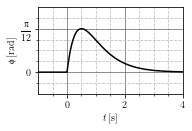

In [128]:
fig = generate_canvas()
ax = fig.gca()
ylim([-np.pi/24, 3*np.pi/24])
xlim([-1, 4])
xlabel(r"$t\,\rm[s]$")
ylabel(r"$\upphi\,\rm[rad]$")
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(denominator=12)))
t = linspace(-1, 5, 1000)
phi = pi*e/6 * t * np.exp(-2*t)
plot(t,phi*u(t), 'k') 
plt.savefig( "BG_plot.pdf", bbox_inches="tight", ppad_inches="tight" )

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_74452/1032758415.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("vrste_rl_1.pdf", bbox_inches='tight', ppad_inches=0)


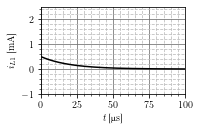

In [129]:
generate_canvas()
t = np.linspace(0, 100e-6,1000)
lam0 = -5e4
v = 0.5e-3 * exp(lam0*t)
plt.plot(t / 1e-6, v / 1e-3, 'k')
plt.xlabel(r'$t\,$[$\upmu$s]')
plt.ylabel(r'$i_{L1}\,$[mA]')
plt.ylim([-1, 2.5])
plt.xlim([0, 100])
plt.savefig("vrste_rl_1.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_74452/4263483566.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("vrste_rl_2.pdf", bbox_inches='tight', ppad_inches=0)


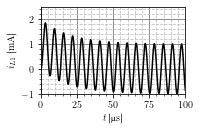

In [130]:
generate_canvas()
t = np.linspace(0, 100e-6,1000)
lam0 = -5e4
w = 1e6
v = 1e-3 * (exp(lam0*t) - cos(w*t))
plt.plot(t / 1e-6, v / 1e-3, 'k')
plt.xlabel(r'$t\,$[$\upmu$s]')
plt.ylabel(r'$i_{L1}\,$[mA]')
plt.ylim([-1, 2.5])
plt.xlim([0, 100])
plt.savefig("vrste_rl_2.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')
/tmp/ipykernel_74452/1074139872.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppad_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("vrste_rl_3.pdf", bbox_inches='tight', ppad_inches=0)


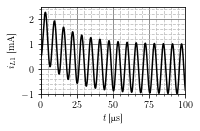

In [131]:
generate_canvas()
t = np.linspace(0, 100e-6,1000)
lam0 = -5e4
w = 1e6
v = 1e-3 * (exp(lam0*t) - cos(w*t)) + 0.5e-3*exp(lam0*t)
plt.plot(t / 1e-6, v / 1e-3, 'k')
plt.xlabel(r'$t\,$[$\upmu$s]')
plt.ylabel(r'$i_{L1}\,$[mA]')
plt.ylim([-1, 2.5])
plt.xlim([0, 100])
plt.savefig("vrste_rl_3.pdf", bbox_inches='tight', ppad_inches=0)

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


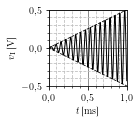

In [132]:
generate_canvas(w = 1.4, a = 1)
t_ax = np.linspace(-25e-6, 1e-3,10000)
w0 = 1e5
xlim([0,1])
ylim([-0.5, +0.5])
plt.plot(t_ax/1e-3, -500 * t_ax*cos(w0*t_ax) * (t_ax >= 0.0), 'k', lw = 1   )
plt.plot(t_ax/1e-3, 500 * t_ax * (t_ax >= 0.0)  , 'k--', lw = 0.8 )
plt.plot(t_ax/1e-3, -500 * t_ax * (t_ax >= 0.0)  , 'k--', lw = 0.8 )
plt.xlabel(r'$t\,$[ms]')
plt.ylabel(r'$v_{\rm I}\,$[V]')
plt.savefig("LC_b.pdf", bbox_inches="tight")

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


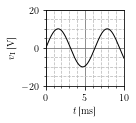

In [133]:
generate_canvas(w = 1.4, a = 1)
t_ax = np.linspace(-25e-6, 10e-3,10000)
w0 = 1e3
xlim([0,10])
ylim([-20, +20])
plt.plot(t_ax/1e-3, 10 * sin(w0*t_ax) * (t_ax >= 0.0), 'k', lw = 1   )
plt.xlabel(r'$t\,$[ms]')
plt.ylabel(r'$v_{\rm I}\,$[V]')
plt.savefig("LC_a.pdf", bbox_inches="tight")

/tmp/ipykernel_74452/1215295739.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='major', color='0.45', linestyle='-')
/tmp/ipykernel_74452/1215295739.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  grid(b=True, which='minor', color='0.75', linestyle='--')


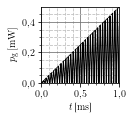

In [134]:
generate_canvas(w = 1.4, a = 1)
t_ax = np.linspace(-25e-6, 1e-3,10000)
w0 = 1e5
xlim([0,1])
ylim([-0, +0.5])
plt.plot(t_ax/1e-3, 250 * t_ax*(1 + cos(w0*t_ax*2)) * (t_ax >= 0.0), 'k', lw = 1   )
plt.plot(t_ax/1e-3, 500 * t_ax * (t_ax >= 0.0)  , 'k--', lw = 0.8 )
plt.xlabel(r'$t\,$[ms]')
plt.ylabel(r'$p_{\rm g}\rm\,[mW]$')
plt.savefig("LC_v.pdf", bbox_inches="tight")